In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [54]:
File_Path = r'C:\Users\User\Desktop\Excel\housePrice.csv'
df = pd.read_csv(File_Path)

In [55]:
header = ['Areas','Rooms','Parking-lot','Warehouse','Having-Elevator','Location','Price-Rial','Price-USD']
df.columns = header

In [56]:
df = df.replace(' ',np.nan)
df = df.dropna(subset=['Price-USD'],axis=0)

In [57]:
df.dtypes

Areas               object
Rooms                int64
Parking-lot           bool
Warehouse             bool
Having-Elevator       bool
Location            object
Price-Rial         float64
Price-USD          float64
dtype: object

In [58]:
for columns in header:
    if isinstance(type(df[columns]),float or int):
        df[columns].replace(np.nan,df[columns].mean())
    if isinstance(type(df[columns]),str or bool):
        df[columns].replace(np.nan,df[columns].value_counts().idxmax())

In [59]:
df.describe( include = "all" )

,Areas,Rooms,Parking-lot,Warehouse,Having-Elevator,Location,Price-Rial,Price-USD
count,3479,3479.000000,3479,3479,3479,3456,3.479000e+03,3.479000e+03
unique,243,NaN,2,2,2,192,NaN,NaN
top,75,NaN,True,True,True,Punak,NaN,NaN
freq,111,NaN,2950,3182,2739,161,NaN,NaN
mean,NaN,2.079908,NaN,NaN,NaN,NaN,5.359023e+09,1.786341e+05
std,NaN,0.758275,NaN,NaN,NaN,NaN,8.099935e+09,2.699978e+05
min,NaN,0.000000,NaN,NaN,NaN,NaN,3.600000e+06,1.200000e+02
25%,NaN,2.000000,NaN,NaN,NaN,NaN,1.418250e+09,4.727500e+04
50%,NaN,2.000000,NaN,NaN,NaN,NaN,2.900000e+09,9.666667e+04
75%,NaN,2.000000,NaN,NaN,NaN,NaN,6.000000e+09,2.000000e+05


In [60]:
df['Price-Rial-Standard_score'] = (df['Price-Rial'] - df['Price-Rial'].mean()) / df['Price-Rial'].std()
df['Price-Rial'] = df['Price-Rial'] / 262300
df.rename(columns={'Price-Rial':'Price-USD-Today'},inplace=True)

In [61]:
df = df.drop(['Price-USD'],axis=1)

In [62]:
bins = np.linspace(min(df['Price-USD-Today']),max(df['Price-USD-Today']),6)
group_names = ['very-low','low','medium','high','very-high']
df['Price-USD-Today-binned'] = pd.cut(df['Price-USD-Today'],bins=bins,labels=group_names)

In [63]:
df.reset_index( drop=True , inplace=True)

In [64]:
bool_column = ['Parking-lot','Warehouse','Having-Elevator']
for column in bool_column:
    df[column] = df[column].astype('object')
df.dtypes

Areas                          object
Rooms                           int64
Parking-lot                    object
Warehouse                      object
Having-Elevator                object
Location                       object
Price-USD-Today               float64
Price-Rial-Standard_score     float64
Price-USD-Today-binned       category
dtype: object

In [65]:
df['Parking-lot'] = df['Parking-lot'].replace(True,'Having_Parking_lot')
df['Parking-lot'] = df['Parking-lot'].replace(False,'Not_Having_Parking_lot')
df['Warehouse'] = df['Warehouse'].replace(True,'Having_Warehouse')
df['Warehouse'] = df['Warehouse'].replace(False,'Not_Having_Warehouse')
df['Having-Elevator'] = df['Having-Elevator'].replace(True,'Having_Elevator')
df['Having-Elevator'] = df['Having-Elevator'].replace(False,'Not_Having_Elevator')


In [66]:
dummy_variable_1 = pd.get_dummies(df['Parking-lot'])
dummy_variable_2 = pd.get_dummies(df['Warehouse'])
dummy_variable_3 = pd.get_dummies(df['Having-Elevator'])
df = pd.concat([df,dummy_variable_1,dummy_variable_2,dummy_variable_3],axis=1)

In [67]:
df

,Areas,Rooms,Parking-lot,Warehouse,Having-Elevator,Location,Price-USD-Today,Price-Rial-Standard_score,Price-USD-Today-binned,Having_Parking_lot,Not_Having_Parking_lot,Having_Warehouse,Not_Having_Warehouse,Having_Elevator,Not_Having_Elevator
0,63,1,Having_Parking_lot,Having_Warehouse,Having_Elevator,Shahran,7052.992756,-0.433216,very-low,1,0,1,0,1,0
1,60,1,Having_Parking_lot,Having_Warehouse,Having_Elevator,Shahran,7052.992756,-0.433216,very-low,1,0,1,0,1,0
2,79,2,Having_Parking_lot,Having_Warehouse,Having_Elevator,Pardis,2096.835684,-0.593711,very-low,1,0,1,0,1,0
3,95,2,Having_Parking_lot,Having_Warehouse,Having_Elevator,Shahrake Qods,3440.716737,-0.550192,very-low,1,0,1,0,1,0
4,123,2,Having_Parking_lot,Having_Warehouse,Having_Elevator,Shahrake Gharb,26686.999619,0.202591,very-low,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,86,2,Having_Parking_lot,Having_Warehouse,Having_Elevator,Southern Janatabad,13343.499809,-0.229511,very-low,1,0,1,0,1,0
3475,83,2,Having_Parking_lot,Having_Warehouse,Having_Elevator,Niavaran,25924.513915,0.177900,very-low,1,0,1,0,1,0
3476,75,2,Not_Having_Parking_lot,Not_Having_Warehouse,Not_Having_Elevator,Parand,1391.536409,-0.616551,very-low,0,1,0,1,0,1
3477,105,2,Having_Parking_lot,Having_Warehouse,Having_Elevator,Dorous,21349.599695,0.029751,very-low,1,0,1,0,1,0


<AxesSubplot:xlabel='Having-Elevator', ylabel='Price-USD-Today'>

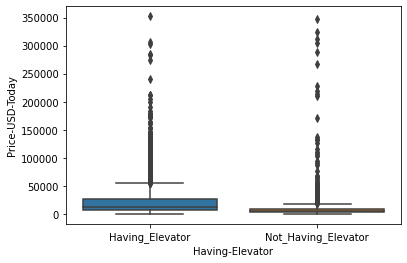

In [68]:
sns.boxplot(x='Having-Elevator',y='Price-USD-Today',data=df)

Text(0, 0.5, 'Price_USD_Today')

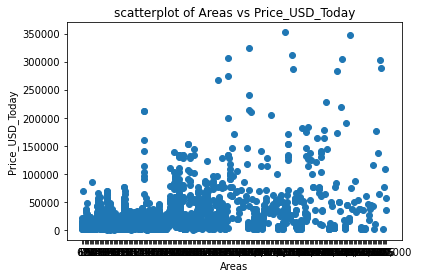

In [69]:
x = df['Areas']
y = df['Price-USD-Today']
plt.scatter(x,y)
plt.title("scatterplot of Areas vs Price_USD_Today")
plt.xlabel('Areas')
plt.ylabel('Price_USD_Today')

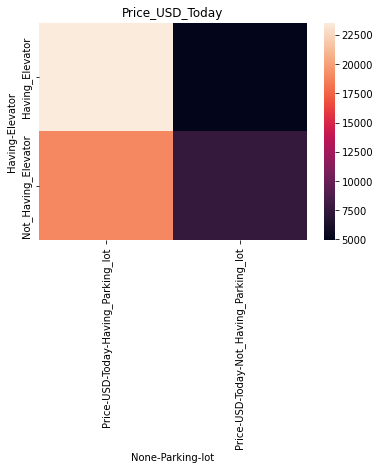

In [70]:
df_sample = df[['Having-Elevator','Parking-lot','Price-USD-Today']]
df_sample_grp = df_sample.groupby(['Having-Elevator','Parking-lot'],as_index=False).mean()
df_sample_Pivot = df_sample_grp.pivot(index='Having-Elevator',columns='Parking-lot')
sns.heatmap(df_sample_Pivot)
plt.title('Price_USD_Today')
plt.show()

In [71]:
df_anova = df[['Parking-lot','Price-USD-Today']]
grouped_anova = df_anova.groupby(['Parking-lot'])
anova_result = f_oneway(grouped_anova.get_group('Having_Parking_lot')['Price-USD-Today'],grouped_anova.get_group('Not_Having_Parking_lot')['Price-USD-Today'])
anova_result

F_onewayResult(statistic=130.34270155932523, pvalue=1.1564940537251408e-29)

(0.0, 370270.6658185526)

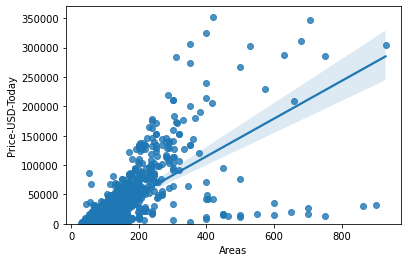

In [72]:
df['Areas'] = pd.to_numeric(df['Areas'],errors = 'coerce')
sns.regplot(x='Areas' , y='Price-USD-Today' , data=df)
plt.ylim(0,)

In [73]:
df['Areas'] = df['Areas'].replace(' ' or np.nan , df['Areas'].mean())
df['Areas'] = df['Areas'].astype('float')

In [74]:
Pearson_Coef , P_Value = pearsonr(df['Rooms'],df['Price-USD-Today'])
Pearson_Coef , P_Value

(0.5677324853080685, 4.102914231350846e-296)

In [75]:
df.corr()

,Areas,Rooms,Price-USD-Today,Price-Rial-Standard_score,Having_Parking_lot,Not_Having_Parking_lot,Having_Warehouse,Not_Having_Warehouse,Having_Elevator,Not_Having_Elevator
Areas,1.000000,0.672959,0.722647,0.722647,0.197698,-0.197698,0.076829,-0.076829,0.052384,-0.052384
Rooms,0.672959,1.000000,0.567732,0.567732,0.274804,-0.274804,0.129888,-0.129888,0.181707,-0.181707
Price-USD-Today,0.722647,0.567732,1.000000,1.000000,0.190086,-0.190086,0.109367,-0.109367,0.111446,-0.111446
Price-Rial-Standard_score,0.722647,0.567732,1.000000,1.000000,0.190086,-0.190086,0.109367,-0.109367,0.111446,-0.111446
Having_Parking_lot,0.197698,0.274804,0.190086,0.190086,1.000000,-1.000000,0.432118,-0.432118,0.431292,-0.431292
Not_Having_Parking_lot,-0.197698,-0.274804,-0.190086,-0.190086,-1.000000,1.000000,-0.432118,0.432118,-0.431292,0.431292
Having_Warehouse,0.076829,0.129888,0.109367,0.109367,0.432118,-0.432118,1.000000,-1.000000,0.203174,-0.203174
Not_Having_Warehouse,-0.076829,-0.129888,-0.109367,-0.109367,-0.432118,0.432118,-1.000000,1.000000,-0.203174,0.203174
Having_Elevator,0.052384,0.181707,0.111446,0.111446,0.431292,-0.431292,0.203174,-0.203174,1.000000,-1.000000
Not_Having_Elevator,-0.052384,-0.181707,-0.111446,-0.111446,-0.431292,0.431292,-0.203174,0.203174,-1.000000,1.000000


In [76]:
df[['Areas']] = df[['Areas']].replace(' ' , df[['Areas']].mean())
df[['Areas']] = df[['Areas']].replace(np.nan , df[['Areas']].mean())

In [77]:
Pearson_Coef , P_Value = pearsonr(df['Areas'],df['Price-USD-Today'])
Pearson_Coef , P_Value

(0.7223909526631838, 0.0)

In [78]:
lr = LinearRegression()
x = df[['Areas']]
y = df[['Price-USD-Today']]
lr.fit(x,y)
lr.intercept_ , lr.coef_
lr.predict([[70]])

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[8594.10409126]])

In [79]:
Multiple_x = df[['Areas','Rooms','Having_Parking_lot','Having_Elevator']]
lr.fit(Multiple_x,df[['Price-USD-Today']])
lr.coef_ , lr.intercept_
yhat = lr.predict(df[['Areas','Rooms','Having_Parking_lot','Having_Elevator']])

<AxesSubplot:xlabel='Rooms', ylabel='Price-USD-Today'>

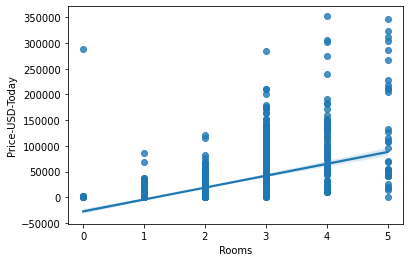

In [80]:
sns.regplot(x='Rooms' , y='Price-USD-Today' , data=df)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Areas', ylabel='Price-USD-Today'>

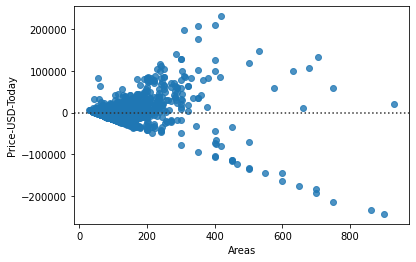

In [81]:
sns.residplot(df['Areas'],df[['Price-USD-Today']])

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price-USD-Today', ylabel='Density'>

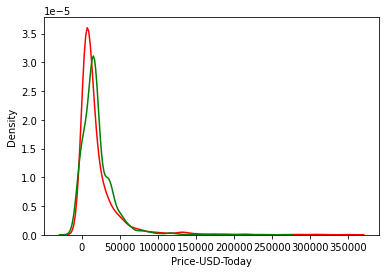

In [82]:
ax1 = sns.distplot(df['Price-USD-Today'],hist=False,color='r',label='Actual Price')
sns.distplot(yhat,hist=False,color='g',label='Predicted Price',ax=ax1)

In [83]:
f = np.polyfit(df['Areas'],df['Price-USD-Today'],3)
p = np.poly1d(f)
print(p)

            3          2
-0.0006788 x + 0.3925 x + 324.5 x - 1.769e+04


In [84]:
pr = PolynomialFeatures(degree=2,include_bias=False)
x_polly = pr.fit_transform(df[['Areas','Rooms']])
lr.fit(x_polly,df['Price-USD-Today'])
lr.coef_
lr.predict(pr.fit_transform([[80,2]]))

array([8447.27824217])

In [85]:
scale = StandardScaler()
scale.fit(df[['Areas','Rooms']])
x_scale = scale.transform(df[['Areas','Rooms']])
lr.fit(x_scale,df['Price-USD-Today'])
lr.predict(scale.transform([[80,2]]))

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([12525.22236248])

In [86]:
Input = [('scale',StandardScaler()) , ('Polynomial',PolynomialFeatures(degree=2)) , ('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(df[['Areas','Rooms']],df[['Price-USD-Today']])
pipe.predict([[80,2]])

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[8447.27824214]])

In [87]:
mean_squared_error(df[['Price-USD-Today']],yhat)

441502139.89230996

In [88]:
x = df[['Areas']]
y = df[['Price-USD-Today']]
lr.fit(x,y)
lr.score(x,y)

0.5218486884896228

In [89]:
lr.fit(df[['Areas']],df[['Price-USD-Today']])
lr.predict([[90]])
lr.coef_

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[321.87444958]])

In [90]:
x_train , x_test , y_train , y_test = train_test_split(df[['Areas']],df[['Price-USD-Today']],test_size=0.3,random_state=0)

In [91]:
scores = cross_val_score(lr,df[['Areas']],df[['Price-USD-Today']],cv=4)
np.mean(scores)

0.5012016225566379

In [92]:
yhat_2 = cross_val_predict(lr,df[['Areas']],df[['Price-USD-Today']],cv=4)
yhat_2

array([[ 6138.91644189],
       [ 5175.11403953],
       [11279.19592115],
       ...,
       [10280.49092515],
       [20173.4253695 ],
       [12588.8422955 ]])

In [ ]:
R_square = []
order = [1,2,3,4,5,6]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    lr.fit(x_train_pr,y_train)
    R_square.append(lr.score(x_test_pr,y_test))
R_square

In [ ]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(df[['Areas']],df[['Price-USD-Today']])
RidgeModel.predict([[80]])

In [ ]:
parameters = [{'alpha':[0.01,0.1,1,10,100],'normalize':[True,False]}]
RR = Ridge()
Grid = GridSearchCV(RR,parameters,cv=4)
Grid.fit(df[['Areas']],df[['Price-USD-Today']])
Grid.best_estimator_
scores_2 = Grid.cv_results_
scores_2['mean_test_score']

In [ ]:
for param , mean_val in zip(scores_2['params'],scores_2['mean_test_score']):
    print(param , "R^2 on test data:" , mean_val )